<a id="#"></a>   
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:90%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Introduction</p>

<div style='border: 3px solid none; background-color:#FDFBF8; padding:20px;'>
    <p style="font-family: Century Gothic; font-size: 18px; margin-top: 10px; margin-bottom: 10px;">
        <b>Machine Learning Course</b> <br><br>
        Prof.<br>
        Dr. Mohammad Zare<br><br>
        Developer:<br>
        <b>Danial Soleimany</b>.<br>Std NO. 140212459023   
    </p>
</div>


<a id="contents_tabel"></a>   
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:90%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Table Of Contents</p>

 <div style="border-radius:10px; padding: 15px; background-color: #FDFBF8; font-size:115%; text-align:left">

    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Create Dataset](#create)
* [Step 3 | Label Encoding](#encoding)
* [Step 4 | Feature Scaling](#scaling)
* [Step 5 | Split Data](#split)   
* [Step 5 | Train Data](#train)    
* [Step 6 | Plot Evaluations](#evaluation)   
    
    
 

<a id="import"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Import Librares</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

<a id="create"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Create Dataset</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
data = {
    "outlook": ["sunny", "sunny", "overcast", "rainy", "rainy", "rainy", "overcast", "sunny", "sunny", "rainy", "sunny", "overcast", "overcast", "rainy"],
    "temperature": [85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71],
    "humidity": [85, 90, 86, 96, 80, 70, 65, 95, 70, 80, 70, 90, 75, 91],
    "wind": ["FALSE", "TRUE", "FALSE", "FALSE", "FALSE", "TRUE", "TRUE", "FALSE", "FALSE", "FALSE", "TRUE", "TRUE", "FALSE", "TRUE"],
    "play": ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]
}

df = pd.DataFrame(data)
df

,outlook,temperature,humidity,wind,play
0,sunny,85,85,FALSE,no
1,sunny,80,90,TRUE,no
2,overcast,83,86,FALSE,yes
3,rainy,70,96,FALSE,yes
4,rainy,68,80,FALSE,yes
5,rainy,65,70,TRUE,no
6,overcast,64,65,TRUE,yes
7,sunny,72,95,FALSE,no
8,sunny,69,70,FALSE,yes
9,rainy,75,80,FALSE,yes


<a id="encoding"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Label Encoding</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [3]:
label_encoder = LabelEncoder()
df['outlook'] = label_encoder.fit_transform(df['outlook'])
df['wind'] = label_encoder.fit_transform(df['wind'])
df['play'] = label_encoder.fit_transform(df['play'])


<a id="scaling"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Feature Scaling</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [4]:
scaler = StandardScaler()
df[['temperature', 'humidity']] = scaler.fit_transform(df[['temperature', 'humidity']])

<a id="split"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Split Data</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [5]:
X = df.drop('play', axis=1)
y = df['play']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="train"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Train Data</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [6]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
1/1 [==============================] - 1s 512ms/step - loss: 0.7287 - accuracy: 0.2727 - val_loss: 0.7064 - val_accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 0.7172 - accuracy: 0.3636 - val_loss: 0.7051 - val_accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 0.7064 - accuracy: 0.4545 - val_loss: 0.7042 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6960 - accuracy: 0.5455 - val_loss: 0.7038 - val_accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6860 - accuracy: 0.7273 - val_loss: 0.7026 - val_accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6764 - accuracy: 0.7273 - val_loss: 0.7008 - val_accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6674 - accuracy: 0.7273 - val_loss: 0.6989 - val_accuracy: 0.3333
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 21ms/step - loss: 0.3830 - accuracy: 0.8182 - val_loss: 0.7116 - val_accuracy: 0.3333
Epoch 60/100
1/1 [==============================] - 0s 23ms/step - loss: 0.3782 - accuracy: 0.8182 - val_loss: 0.7139 - val_accuracy: 0.3333
Epoch 61/100
1/1 [==============================] - 0s 23ms/step - loss: 0.3735 - accuracy: 0.8182 - val_loss: 0.7164 - val_accuracy: 0.3333
Epoch 62/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3688 - accuracy: 0.8182 - val_loss: 0.7190 - val_accuracy: 0.3333
Epoch 63/100
1/1 [==============================] - 0s 23ms/step - loss: 0.3641 - accuracy: 0.8182 - val_loss: 0.7216 - val_accuracy: 0.3333
Epoch 64/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3596 - accuracy: 0.8182 - val_loss: 0.7242 - val_accuracy: 0.3333
Epoch 65/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3549 - accuracy: 0.8182 - val_loss: 0.7268 - val_accuracy: 0.3333
Epoch 66/100
1/1 [========

<a id="evaluation"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Plot Evaluations</p>
⬆️ [Tabel of Contents](#contents_tabel)

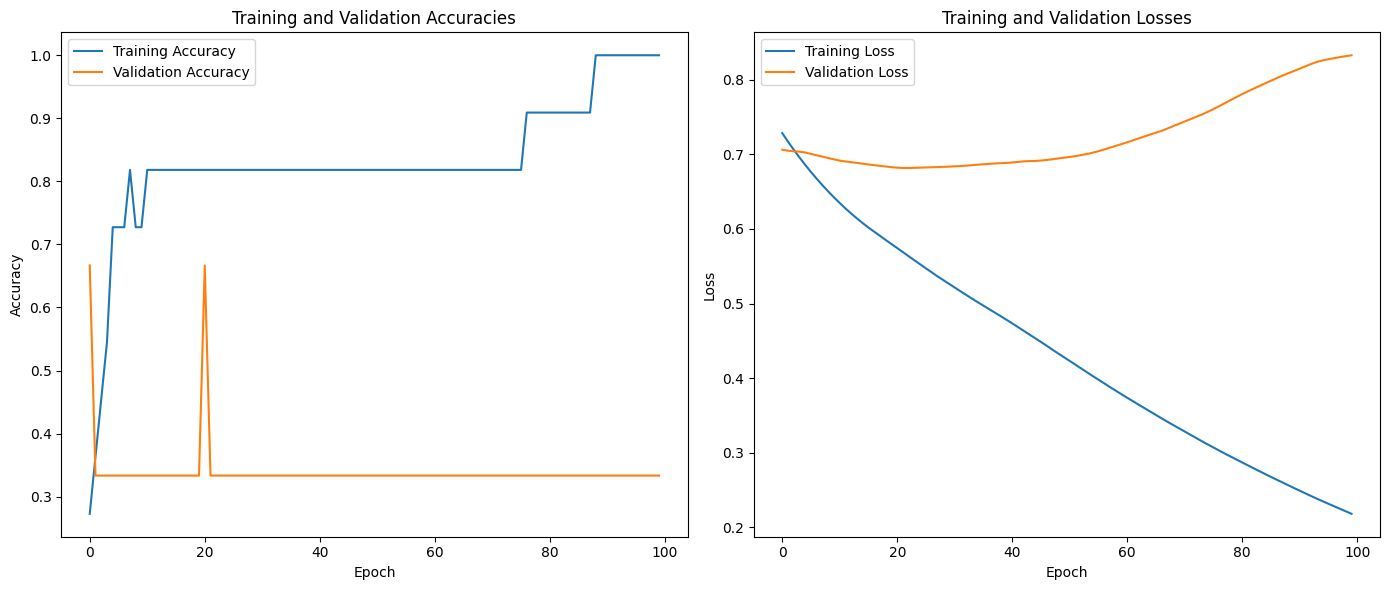

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracies')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Losses')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

<a id="table"></a>
# <p style="padding:10px;background-color:#3E444F ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:60%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Best Regards</p>